In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

In [4]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN


How many rows and columns are in gdp_df? What are the data types of each column?

In [5]:
## number of rows & columns
gdp_df.shape

(7176, 4)

In [6]:
## data type is 'object' for columns
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
## dropping 'Value Footnotes' column
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
## renaming columns
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [8]:
## playing with .loc & value_counts
gdp_df.loc[(gdp_df.Year>=1990) & (gdp_df.Year<=2020)]

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [9]:
gdp_df.value_counts('Country')==31

Country
Least developed countries: UN classification           True
Niger                                                  True
Middle East & North Africa (excluding high income)     True
Middle income                                          True
Mongolia                                               True
                                                      ...  
Kosovo                                                False
Turks and Caicos Islands                              False
Sint Maarten (Dutch part)                             False
Somalia                                               False
Djibouti                                              False
Length: 242, dtype: bool

In [10]:
gdp_df.Year.value_counts()

2018    242
2017    242
2016    242
2015    242
2014    242
2013    242
2019    241
2020    240
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
1999    227
1998    226
1997    226
1996    222
1995    222
1994    211
1993    209
1992    208
1991    207
1990    206
Name: Year, dtype: int64

It appears that several countries did not have data prior to around 2000.

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [11]:
## creating new df with 2020 only
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020].sort_values(by = 'Country', ascending=True)

C:\Users\danil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


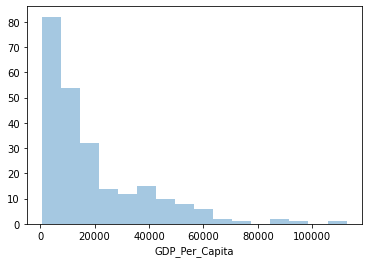

In [12]:
## histogram
sns.distplot(a=gdp_2020['GDP_Per_Capita'], hist=True, kde=False, rug=False)
plt.show()

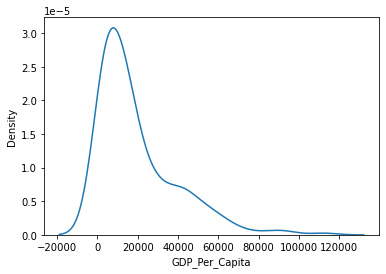

In [13]:
## density plot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])
plt.show()

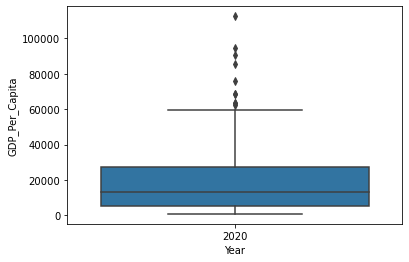

In [14]:
## boxplot
sns.boxplot(x=gdp_2020.Year, y=gdp_2020.GDP_Per_Capita)
plt.show()

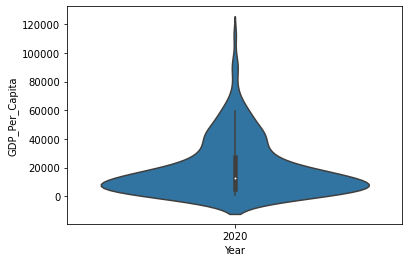

In [15]:
## violin plot
sns.violinplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])
plt.show()

The vast majority of countries have a very low GDP per capita (below 20,000), with a good chunk also in a midrange 20,000 to 60,000.

What was the median GDP per capita value in 2020?

In [16]:
## median of GDP per capita in 2020
gdp_2020['GDP_Per_Capita'].median()

12908.9374056206

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

- A boxplot

- A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

- A scatterplot

- A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [17]:
## creating list to look for in .isin below
decades_list = [1990, 2000, 2010, 2020]

In [18]:
## creating new df with only years 1990, 2000, 2010, & 2020.
gdp_decades = gdp_df.loc[gdp_df.Year.isin(decades_list)].sort_values(by = 'Year', ascending=True)
gdp_decades.head()

,Country,Year,GDP_Per_Capita
7175,Zimbabwe,1990,2652.129209
1352,Comoros,1990,3061.328732
6219,Sub-Saharan Africa (IDA & IBRD),1990,2969.313941
3189,Jamaica,1990,8592.387094
1383,Congo,1990,5068.286948


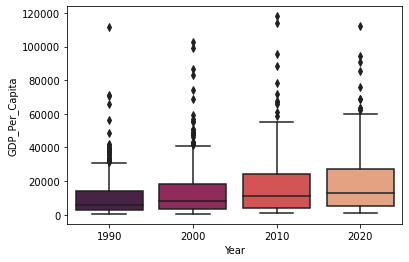

In [19]:
## boxplot:
sns.boxplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita, palette='rocket')
plt.show()

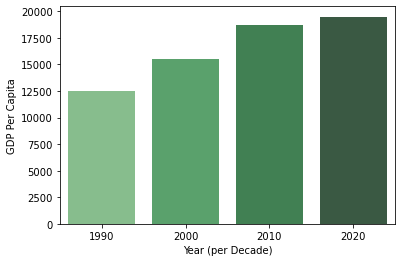

In [20]:
## barplot
decades_barplot = sns.barplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita, ci=None, palette='Greens_d')
decades_barplot.set(xlabel = 'Year (per Decade)', ylabel = 'GDP Per Capita')
plt.show()

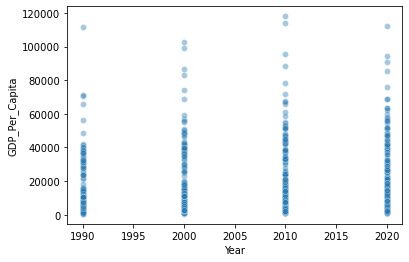

In [21]:
## scatterplot:
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita', alpha =0.4)
plt.show()

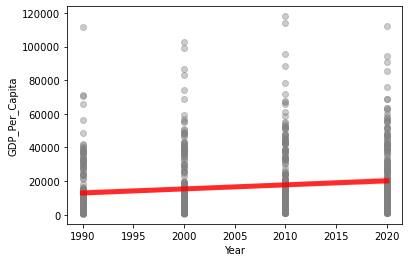

In [22]:
## scatterplot w/regplot:
sns.regplot(x=gdp_decades.Year, y=gdp_decades.GDP_Per_Capita,
            scatter_kws={'color':'grey', 'alpha':0.4}, line_kws={'color':'red', 'alpha':0.8, 'lw':5})
plt.show()

There has been a steady increase in overall GDP per capita worldwide, and the majority has spread to a wider band.

Which country was the first to have a GDP per capita greater than $100,000?

In [23]:
first_country = gdp_df.loc[gdp_df.GDP_Per_Capita >= 100000].sort_values(by='Year', ascending=True).head(1)
first_country

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


United Arab Emirates was the first country to reach over 100,000 GDP per capita in 1990.

Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [24]:
highest_gdp_2020 = gdp_df.loc[gdp_df.Year==2020].sort_values(by='GDP_Per_Capita', ascending=False).head(1)
highest_gdp_2020

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


Luxembourg was the country with the highest GDP per capita in 2020.

In [25]:
luxembourg_gdp = gdp_df.loc[gdp_df.Country=='Luxembourg'].sort_values(by='Year', ascending=True).reset_index(drop=True)
luxembourg_gdp.head()

,Country,Year,GDP_Per_Capita
0,Luxembourg,1990,70860.819124
1,Luxembourg,1991,75961.668717
2,Luxembourg,1992,76323.304753
3,Luxembourg,1993,78468.921760
4,Luxembourg,1994,80365.224508


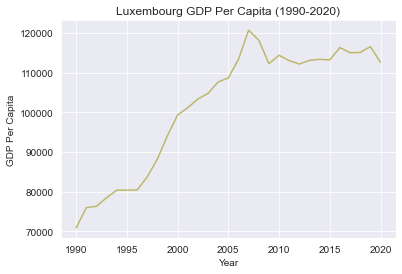

In [26]:
sns.set_style('darkgrid')
luxembourg_bar = sns.lineplot(data=luxembourg_gdp, x='Year', y='GDP_Per_Capita', color='darkkhaki')
luxembourg_bar.set(ylabel='GDP Per Capita', title='Luxembourg GDP Per Capita (1990-2020)')
plt.show()

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [27]:
lowest_gdp_2020 = gdp_df.loc[gdp_df.Year==2020].sort_values(by='GDP_Per_Capita', ascending=True).head(1)
lowest_gdp_2020

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


The country with the lowest GDP per capita in 2020 was Burundi.

In [28]:
burundi_gdp = gdp_df.loc[gdp_df.Country=='Burundi'].sort_values(by='Year').reset_index(drop=True)
burundi_gdp.head()

,Country,Year,GDP_Per_Capita
0,Burundi,1990,1184.842032
1,Burundi,1991,1215.887215
2,Burundi,1992,1202.106321
3,Burundi,1993,1105.228711
4,Burundi,1994,1044.716092


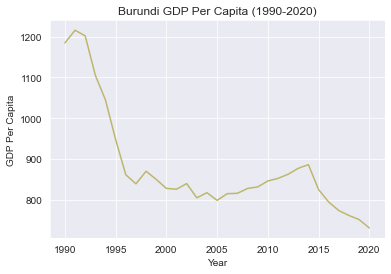

In [29]:
sns.set_style('darkgrid')
burundi_bar = sns.lineplot(data=burundi_gdp, x='Year', y='GDP_Per_Capita', color='darkkhaki')
burundi_bar.set(ylabel='GDP Per Capita', title='Burundi GDP Per Capita (1990-2020)')
plt.show()

In [30]:
## looking for: gdp per capita in 1990 vs 2020 for each country
compare_1990_2020 = [1990, 2020]
compare_all_gdp = gdp_df.loc[gdp_df.Year.isin(compare_1990_2020)].sort_values(by='Country')
compare_all_gdp.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
49,Africa Eastern and Southern,1990,3083.976800
50,Africa Western and Central,2020,4021.293919
80,Africa Western and Central,1990,2810.341129


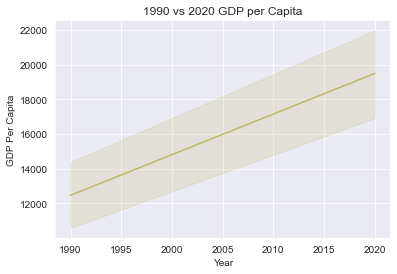

In [31]:
sns.set_style('darkgrid')
compare_all_bar = sns.lineplot(data=compare_all_gdp, x='Year', y='GDP_Per_Capita', color='darkkhaki')
compare_all_bar.set(ylabel='GDP Per Capita', title='1990 vs 2020 GDP per Capita')
plt.show()

In [32]:
## create df for countries whose gdp is less in 2020 than 1990
## i think it's an if statement... just not sure how to formulate it
## i know this isn't right, but it's a start...
if (compare_all_gdp.Country == compare_all_gdp.Country)
    and (compare_all_gdp.Year == 2020):
    print(compare_all_gdp)

SyntaxError: invalid syntax (3622377347.py, line 4)

In [34]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [35]:
## dropping 'Value Footnotes' column
internet_df = internet_df.drop(columns = 'Value Footnotes')

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [37]:
## renaming columns
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df.head(2)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.90


Look at the number of observations in this dataset per year. What do you notice?

In [41]:
internet_df.describe()

,Year,Internet_Users_Pct
count,4495.000000,4495.000000
mean,2002.732814,18.675495
std,7.856270,25.091999
min,1960.000000,0.000000
25%,1998.000000,0.346593
50%,2003.000000,5.265683
75%,2009.000000,30.581020
max,2014.000000,98.160000


In [44]:
internet_df.Year.unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 1990, 2000, 1999, 1998, 1997, 1996, 1995, 1994,
       1993, 1992, 1991, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982,
       1981, 1980, 1979, 1978, 1977, 1976, 1975, 1970, 1965, 1960],
      dtype=int64)

The earliest year is 1960 and the latest is 2014, which is strange, because the internet wasn't invented until the 1980s. Most of the data is in the 2000s, however, which makes sense.

What is the first year to have a non-zero internet users percentage value?

In [59]:
## using a mask to filter non-zero internet users perc
internet_df[internet_df.Internet_Users_Pct != 0].sort_values(by='Year', ascending=True)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


The first year for any country to have recorded internet usage is 1990.

How does the distribution of internet users percent differ for 2000 and 2014?

In [65]:
internet_compare = internet_df.loc[(internet_df.Year == 2000) + (internet_df.Year==2014)]
internet_compare.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
15,Albania,2014,60.100000
29,Albania,2000,0.114097
36,Algeria,2014,18.090000
50,Algeria,2000,0.491706


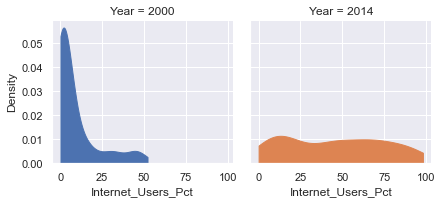

In [79]:
# set seaborn whitegrid theme
sns.set(style='darkgrid')

# using small multiple
# create a grid 
g = sns.FacetGrid(internet_compare, col='Year', hue='Year', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,'Internet_Users_Pct', cut=0, fill=True, common_norm=False, alpha=1, legend=False)

The distribution in 2014 versus in 2000 is much more even.

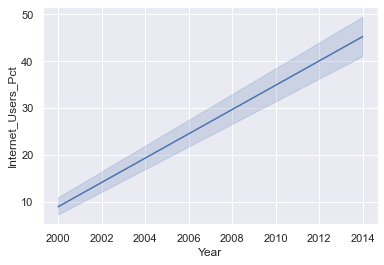

In [80]:
sns.lineplot(data=internet_compare, x='Year', y='Internet_Users_Pct')
plt.show()

The number of users increased greatly from 2000 to 2014, from around 10% to almost 50%.

For how many countries was the percentage of internet users below 5% in 2014?

In [91]:
below_5pct_2014 = internet_df.loc[(internet_df.Year ==2014)&(internet_df.Internet_Users_Pct < 5)]
below_5pct_2014 = below_5pct_2014.reset_index(drop=True)

In [93]:
below_5pct_2014.Country.count()

16

Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [95]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [96]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [104]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df,
                                left_on = ['Country', 'Year'],
                                right_on = ['Country', 'Year'],
                                how='outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [111]:
gdp_internet_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year==2014]
gdp_internet_2014_top3 = gdp_internet_2014.sort_values(by='Internet_Users_Pct', ascending=False).head(3)

In [112]:
gdp_internet_2014_top3

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.741612,98.16
645,Bermuda,2014,77361.104881,96.80
4880,Norway,2014,62390.130313,96.30


In [113]:
top3_list=['Iceland', 'Bermuda', 'Norway']

In [115]:
gdp_internet_top3 = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top3_list)]
gdp_internet_top3

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
639,Bermuda,2020,76105.138057,NaN
640,Bermuda,2019,81681.726668,NaN
641,Bermuda,2018,81423.408453,NaN
642,Bermuda,2017,81834.955874,NaN
643,Bermuda,2016,78149.352535,NaN
...,...,...,...,...
7670,Iceland,1994,NaN,6.794812
7671,Iceland,1993,NaN,2.667825
7672,Iceland,1992,NaN,1.539160
7673,Iceland,1991,NaN,0.505129


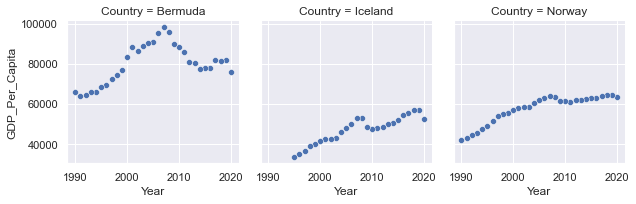

In [129]:
## loading FacetGrid
## g=sns.FacetGrid(gdp_internet_top3)

## assigning variables
g=sns.FacetGrid(gdp_internet_top3, col="Country")

## adding scatterplot
g.map(sns.scatterplot, 'Year', 'GDP_Per_Capita')
plt.show()

There doesn't seem to be much change in the top 3 countries with the highest internet usage over time. Iceland & Norway have steadily increased, while Bermuda seems to have decreased since 2008.

Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [131]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year==2014]

Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

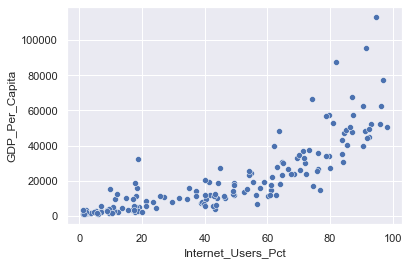

In [135]:
sns.scatterplot(data=gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_Per_Capita')
plt.show()

There is a tight correlation between internet use & GDP per capita in poorer countries - internet use is low where GDP per capita is low.

As internet use increases, GDP per capita stays fairly low, until past 60%, where it starts to curve upwards. It is not as tight a correlation as low GDP per capita & internet use, but generally, GDP per capita increases as internet use increases. There are more outliers for high GDP per capita with higher internet use.

Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".